### Post-process arxiv leaderboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get leaderboard
df = pd.read_csv("../data/processed/leaderboard-spurious-correlation.csv")

# change Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# remove samples outside of Paper Type Method, and Metric above 0.7
df = df.query("`Paper Type` == 'Method' and Metric > 0.7")
df

,Arxiv ID,Date,Paper Title,Application,Domain,Paper Type,Level 1 Taxonomy,Level 2 Taxonomy,Method,Metric,Evidence,Dataset Mentioned
0,2406.01583,2024-10-22,Decomposing And Interpreting Image Representat...,General,Computer Vision,Method,Representation Learning,Feature Disentanglement,REPDECOMPOSE and COMPALIGN framework,0.9780,Table 3: Worst group accuracy and average grou...,True
1,2506.08915,2025-06-18,Inherently Faithful Attention Maps For Vision ...,General,Computer Vision,Method,Representation Learning,Invariant Learning,iFAM,0.9740,"Table 1 (a) on page 5, under 'Waterbird' and '...",True
2,2210.11369,2022-10-21,On Feature Learning In The Presence Of Spuriou...,General,Computer Vision,Method,Post-hoc Methods,Finetuning,Deep Feature Reweighting (DFR),0.9720,"In particular, the ConvNext Large model pretra...",True
3,2212.00921,2022-12-12,Agro: Adversarial Discovery Of Error-Prone Gro...,General,General,Method,Post-hoc Methods,Adversarial Training,AGRO,0.9610,Table 2: Average and WG performance on WILDS d...,True
4,2309.00733,2024-05-03,Texplain: Explaining Learned Visual Features V...,General,Computer Vision,Method,Post-hoc Methods,Identification then Mitigation,TExplain,0.9563,Table 2: Classification results from the Water...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
97,2509.07955,2025-09-10,Ace And Diverse Generalization Via Selective D...,General,Machine Learning,Method,Representation Learning,Feature Disentanglement,ACE,0.7560,Table 1: Incomplete Spurious Correlation Accur...,True
98,2210.09996,2023-08-23,Perceptual Grouping In Contrastive Vision-Lang...,General,Computer Vision,Method,Representation Learning,Invariant Learning,CLIPpy,0.7490,Figure 4 (center) and the associated table on ...,True
99,2302.00070,2023-05-16,Debiasing Vision-Language Models Via Biased Pr...,General,Vision-Language Models,Method,Representation Learning,Invariant Learning,Orth-Cali,0.7400,Table 2: Group Robustness of Vision-Language M...,True
100,2308.04553,2024-07-18,From Fake To Real: Pretraining On Balanced Syn...,General,Computer Vision,Method,Representation Learning,Invariant Learning,From Fake to Real (FFR),0.7260,Table 1: Ablation of FFR stages over SpuCO Ani...,True


### Which taxonomy branch is the most active?

Text(0.5, 1.0, 'Number of Papers by Level 1 Taxonomy Over Years')

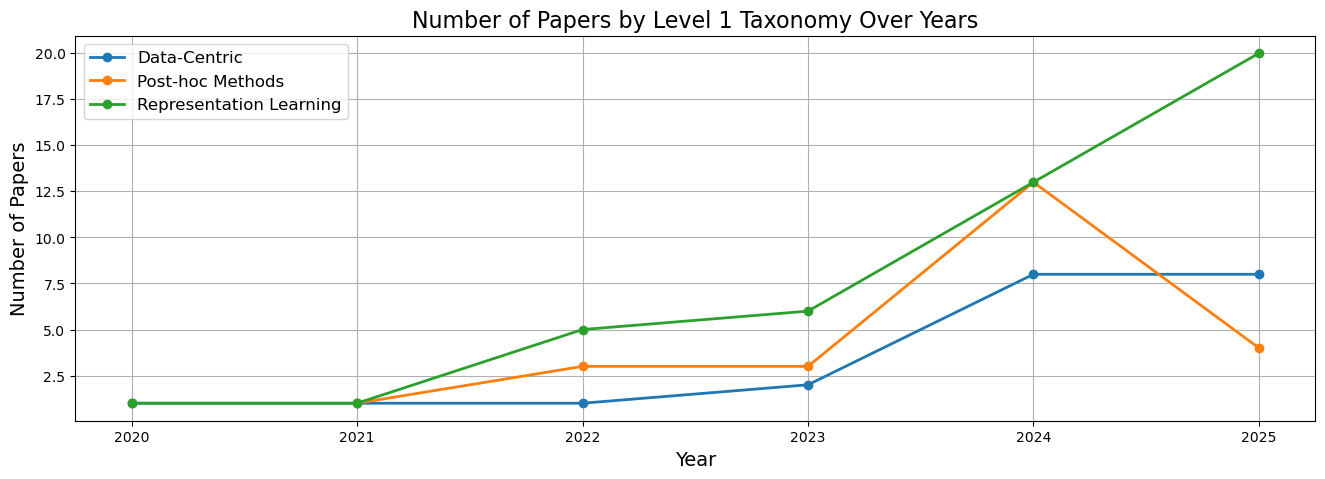

In [3]:
# Plot number of papers by level 1 taxonomy as a function of year
fig, axs = plt.subplots(1, 1, figsize=(16, 5), dpi=100)
for key, grp in df.groupby('Level 1 Taxonomy'):
    grp = grp.sort_values(by='Date')
    grp = grp.groupby(grp['Date'].dt.year).size().reset_index(name='counts')
    axs.plot(grp['Date'], grp['counts'], label=key, marker='o', lw=2)
axs.legend(fontsize=12)
axs.grid()
axs.set_xlabel('Year', fontsize=14)
axs.set_ylabel('Number of Papers', fontsize=14)
axs.set_title('Number of Papers by Level 1 Taxonomy Over Years', fontsize=16)

Text(0.5, 1.0, 'Number of Papers by Level 2 Taxonomy (Representation Learning) Over Years')

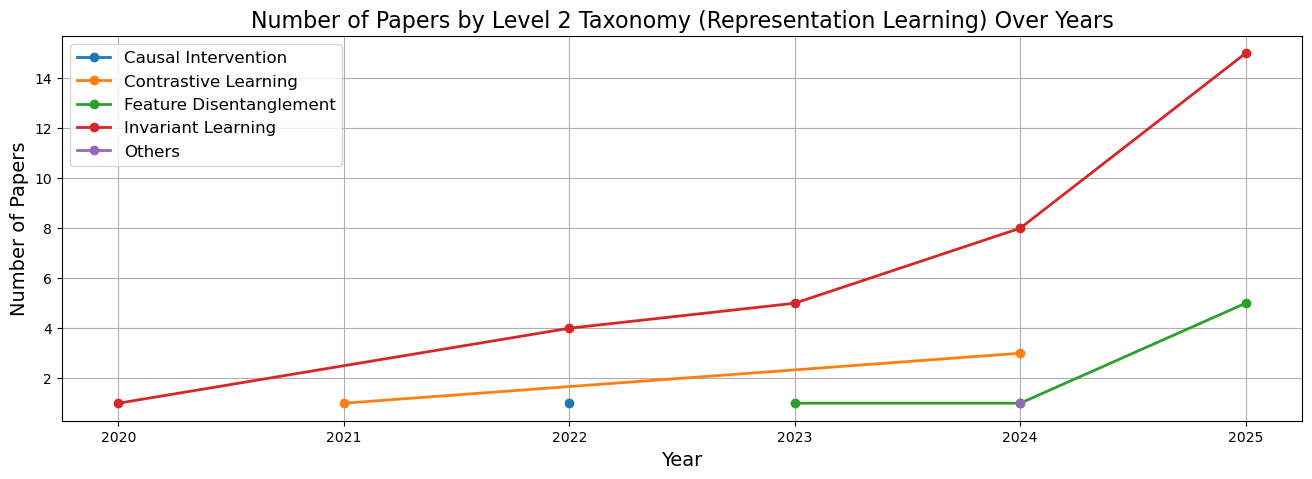

In [4]:
# Plot number of papers by level 2 taxonomy (with representation learning) as a function of year
fig, axs = plt.subplots(1, 1, figsize=(16, 5), dpi=100)
for key, grp in df.query("`Level 1 Taxonomy` == 'Representation Learning'").groupby('Level 2 Taxonomy'):
    grp = grp.sort_values(by='Date')
    grp = grp.groupby(grp['Date'].dt.year).size().reset_index(name='counts')
    axs.plot(grp['Date'], grp['counts'], label=key, marker='o', lw=2)
axs.legend(fontsize=12)
axs.grid()
axs.set_xlabel('Year', fontsize=14)
axs.set_ylabel('Number of Papers', fontsize=14)
axs.set_title('Number of Papers by Level 2 Taxonomy (Representation Learning) Over Years', fontsize=16)

### Which taxonomy branch consistently outperform other branches?

/var/folders/6x/y1zhzhvn299ddgcjncj3kk000000gn/T/ipykernel_9939/2596374705.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


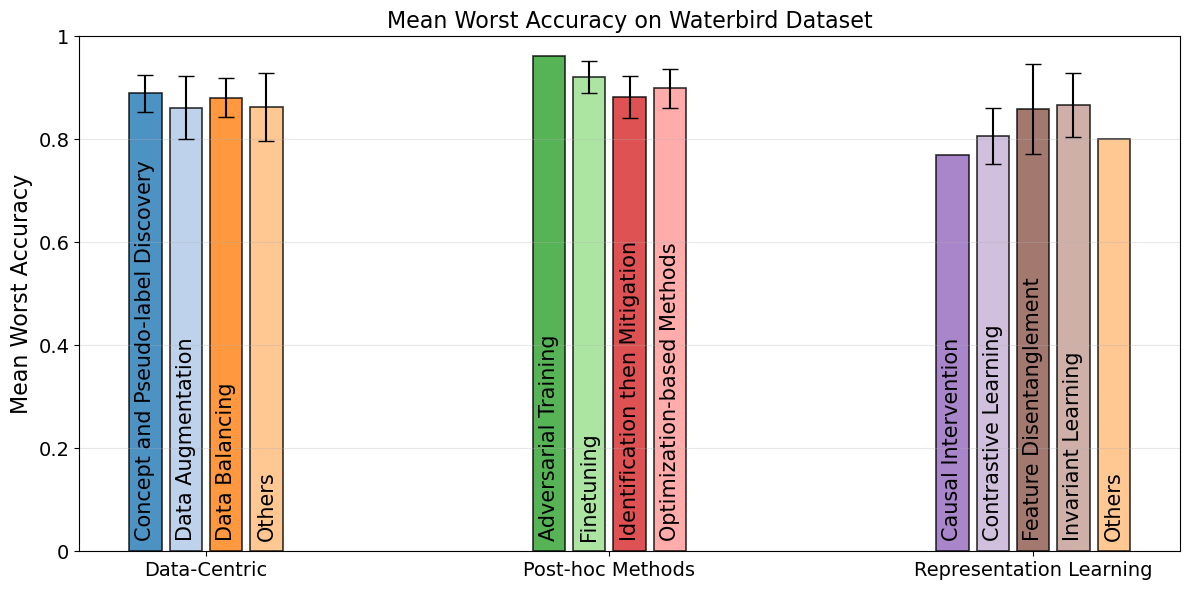

In [5]:
# plot bar chart of mean and standard deviation of Metric by Level 1 Taxonomy
fig, axs = plt.subplots(1, 1, figsize=(12, 6), dpi=100)

# Group by Level 1 and Level 2 taxonomy, calculate mean and std
grouped = df.groupby(['Level 1 Taxonomy', 'Level 2 Taxonomy'])['Metric'].agg(['mean', 'std']).reset_index()

# Get unique Level 1 categories
level1_categories = grouped['Level 1 Taxonomy'].unique()

# Set up bar positions
x_pos = []
bar_width = 0.04
bar_gap = 0.01 
current_x = 0

# Create color map for Level 2 categories
all_level2 = grouped['Level 2 Taxonomy'].unique()
colors_map = plt.cm.tab20(range(len(all_level2)))
level2_to_color = dict(zip(all_level2, colors_map))

# Plot bars
level2_handles = {}
for i, level1 in enumerate(level1_categories):
    level1_data = grouped[grouped['Level 1 Taxonomy'] == level1]
    level2_categories = level1_data['Level 2 Taxonomy'].values
    
    n_bars = len(level2_categories)
    group_positions = [current_x + j * (bar_width + bar_gap) for j in range(n_bars)]
    
    for j, level2 in enumerate(level2_categories):
        row = level1_data[level1_data['Level 2 Taxonomy'] == level2].iloc[0]
        bar = axs.bar(group_positions[j], row['mean'], bar_width, 
                     yerr=row['std'], capsize=6,
                     label=level2 if level2 not in level2_handles else "",
                     color=level2_to_color[level2], alpha=0.8,
                     edgecolor='black', linewidth=1.2)
        if level2 not in level2_handles:
            level2_handles[level2] = bar
        
        axs.text(group_positions[j], 0.02, 
                level2, 
                rotation=90, ha='center', va='bottom', fontsize=15)
    
    # Store the center position for this group
    x_pos.append(current_x + (n_bars - 1) * (bar_width + bar_gap) / 2)
    current_x += n_bars * (bar_width + bar_gap) + 0.3  

axs.set_xticks(x_pos)
axs.set_xticklabels(level1_categories, rotation=0, ha='center', fontsize=14)
axs.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)
axs.set_ylabel('Mean Worst Accuracy', fontsize=16)
axs.set_title('Mean Worst Accuracy on Waterbird Dataset', fontsize=16)
axs.grid(axis='y', alpha=0.3)
axs.set_ylim(0, 1.0) 
plt.tight_layout()
plt.show()

### What are the top 10 methods by metric?

In [6]:
df.sort_values(by='Metric', ascending=False).loc[:10, ['Level 1 Taxonomy', 'Level 2 Taxonomy', 'Method', 'Metric']]

,Level 1 Taxonomy,Level 2 Taxonomy,Method,Metric
0,Representation Learning,Feature Disentanglement,REPDECOMPOSE and COMPALIGN framework,0.9780
1,Representation Learning,Invariant Learning,iFAM,0.9740
2,Post-hoc Methods,Finetuning,Deep Feature Reweighting (DFR),0.9720
3,Post-hoc Methods,Adversarial Training,AGRO,0.9610
4,Post-hoc Methods,Identification then Mitigation,TExplain,0.9563
5,Representation Learning,Feature Disentanglement,Group-aware Autoencoder (GwAE) with PCA,0.9400
6,Post-hoc Methods,Optimization-based Methods,Hierarchical Ambiguity Set DRO,0.9370
7,Representation Learning,Invariant Learning,UnLearning from Experience (ULE),0.9360
8,Post-hoc Methods,Finetuning,Controllable Prompt Tuning (CPT),0.9350
9,Representation Learning,Invariant Learning,Controllable Feature Whitening (CFW),0.9346
